# Projeto 2 - Ciência dos Dados

Nome: _____

Nome: _____

Serão permitidos grupos de três pessoas, mas com uma rubrica mais exigente. Grupos deste tamanho precisarão fazer um questionário de avaliação de trabalho em equipe

___
# Classificador automático de sentimento


## Preparando o ambiente no jupyter:

In [5]:
%%capture

#Instalando o tweepy
!pip install tweepy

In [133]:
import tweepy
import math
import os.path
import pandas as pd
import json
from random import shuffle
import matplotlib.pyplot as plt


___
## Autenticando no  Twitter

* Conta: @EikiMarcelo

___
## Etapas do projeto:

### Escolha de um produto e coleta das mensagens


Capturando os dados do twitter:

Salvando os dados em uma planilha Excel:

___
### Classificando as mensagens na coragem

Esta etapa é manual. Faça a mesma pelo Excel.

In [7]:
#def de limpar palavras
import re 

def cleanup(text):
    """
        Função de limpeza muito simples que troca alguns sinais básicos por espaços
    """
    punctuation = '[!\-.:?;]' # Note que os sinais [] são delimitadores de um conjunto.
    pattern = re.compile(punctuation)
    text_subbed = re.sub(pattern, ' ', text)
    return text_subbed
#Excel
skol_read=pd.read_excel("skol.xlsx")

In [8]:
#Limpeza e separação por relevancia
skol_read.Treinamento.apply(cleanup)
skol_read.rename(columns={'Unnamed: 1':'relevante'},inplace=True)
#Relevante 0
skol_relevante_0=skol_read[skol_read.relevante==0]

#Relevante 1
skol_relevante_1=skol_read[skol_read.relevante==1]
print ("Len relevante 0:",len(skol_relevante_0),"",
       "Len relevante 1:",len(skol_relevante_1))

Len relevante 0: 185  Len relevante 1: 115


In [102]:
# Separando as palavras Relevancia 1
" ".join(skol_relevante_1["Treinamento"]).split()
palavras=pd.DataFrame("".join(skol_relevante_1["Treinamento"]).split())
palavras_relevancia_1=palavras[0].value_counts()
#Tabela Relativa 
palavras_relevancia_1_relativa=palavras[0].value_counts(True)

                              0
0                            um
1                          open
2                            de
3                          skol
4                         beats
5                            em
6                       limeira
7                         seria
8                           uma
9                           boa
10                           ne
11                            ?
12                         😋😁rt
13                  @daumasgeo:
14                        óbvio
15                          que
16                          ela
17                          foi
18                       embora
19                         tava
20                        dando
21                         skol
22                          pra
23                         mina
24    https://t.co/gjdjc9lzgjto
25              procrastinando,
26                          vou
27                      ensinar
28                            a
29                 reaproveitar
...     

In [10]:
# Separando as palavras Relevancia 0
" ".join(skol_relevante_0["Treinamento"]).split()
palavras=pd.DataFrame("".join(skol_relevante_0["Treinamento"]).split())
palavras[0].value_counts()
palavras_relevancia_0=palavras[0].value_counts()
palavras_relevancia_0

#Tabela Relativa 
palavras_relevancia_0_relativa=palavras[0].value_counts(True)

In [11]:
print (palavras_relevancia_0_relativa)

skol                          0.040550
de                            0.034556
e                             0.023625
a                             0.022214
beats                         0.014457
o                             0.013399
eu                            0.013047
da                            0.012341
que                           0.011636
pra                           0.010578
uma                           0.010226
do                            0.009520
é                             0.009520
me                            0.008110
com                           0.007757
no                            0.007052
não                           0.006347
q                             0.006347
em                            0.005994
na                            0.005642
se                            0.005642
um                            0.005642
tu                            0.005289
bebendo                       0.004937
vai                           0.004584
mano                     

___
### Montando o Classificador Naive-Bayes

Considerando apenas as mensagens da planilha Treinamento, ensine  seu classificador.

### <font color = "red"> Lista Prob Relevância 0 (Lista_prob_0):

In [51]:
i=0
lista_frase=[]
lista_palavra = []
while i <=299:
    a=skol_read.iloc[i,0]
    lista_frase.append(a)
    x = lista_frase[i].split(" ")
    lista_palavra.append(x)
    i+=1
lista_palavra



t = 1/(len(palavras_relevancia_0_relativa)+len(palavras_relevancia_0_relativa))

i = 0
produto_prob = []
while i <= 299:
    k = 0
    mult_prob = []
    while k < len(lista_palavra[i]):
        palavra = lista_palavra[i][k]
        if palavra not in palavras_relevancia_0_relativa:
            prob = t
        else:
            prob = palavras_relevancia_0_relativa[palavra] + t
        mult_prob.append(prob)
        k+=1
    #Aqui ja tem lista da probabilidade das palavras
    #print(mult_prob)
    p = 0
    for e in mult_prob:
        if p == 0:
            p = e
        else:
            p = p*e
    produto = p
    produto_prob.append(produto)
    i+=1
Lista_prob_0 = produto_prob

### <font color = "red" > Lista Prob Relevância 1 (Lista_prob_1):

In [54]:
i=0
lista_frase=[]
lista_palavra = []
while i <=299:
    a=skol_read.iloc[i,0]
    lista_frase.append(a)
    x = lista_frase[i].split(" ")
    lista_palavra.append(x)
    i+=1
lista_palavra



t = 1/(len(palavras_relevancia_1_relativa)+len(palavras_relevancia_1_relativa))

i = 0
produto_prob = []
while i <= 299:
    k = 0
    mult_prob = []
    while k < len(lista_palavra[i]):
        palavra = lista_palavra[i][k]
        if palavra not in palavras_relevancia_1_relativa:
            prob = t
        else:
            prob = palavras_relevancia_1_relativa[palavra] + t
        mult_prob.append(prob)
        k+=1
    #Aqui ja tem lista da probabilidade das palavras
    #print(mult_prob)
    p = 0
    for e in mult_prob:
        if p == 0:
            p = e
        else:
            p = p*e
    produto = p
    produto_prob.append(produto)
    i+=1
Lista_prob_1 = produto_prob

### <font color = "red"> Criando a lista analisadora:

In [59]:
lista_analise = []

i=0
analise = 0
while i< len(Lista_prob_1):
    if Lista_prob_1[i] > Lista_prob_0[i]:
        analise = 1
    else:
        analise = 0
    lista_analise.append(analise)
    i+=1
print(lista_analise)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1]


### <font color = "red"> Validando as analises:

#### Adicionando a coluna do resultado:

In [92]:
skol_read["Analises"] = lista_analise

In [106]:
i = 0
verifica = []
while i < len(skol_read):
    ver = False
    if skol_read["relevante"][i] == skol_read["Analises"][i]:
        ver = True
    verifica.append(ver)
    i+=1

In [107]:
skol_read["Verifica"] = verifica
skol_read['Verifica'].value_counts(True)

True     0.606667
False    0.393333
Name: Verifica, dtype: float64

___
### Verificando a performance

Agora você deve testar o seu classificador com a base de Testes.

In [108]:
i = 0
contagem_verdadeiro_positivo = 0
contagem_verdadeiro_negativo = 0
contagem_falso_positivo = 0
contagem_falso_negativo = 0

while i < len(skol_read):
    if skol_read["Verifica"][i] == True:
        if skol_read["relevante"][i] == 1:
            contagem_verdadeiro_positivo+=1
        else:
            contagem_verdadeiro_negativo+=1
    else:
        if skol_read["relevante"][i] == 1:
            contagem_falso_positivo+=1
        else:
            contagem_falso_negativo+=1
    i+=1
            

In [111]:
porc_v_n = contagem_verdadeiro_negativo/300
porc_v_p = contagem_verdadeiro_positivo/300
porc_f_n = contagem_falso_negativo/300
porc_f_p = contagem_falso_positivo/300

In [132]:
print(porc_f_n, porc_f_p, porc_v_n, porc_v_p)
lispie = [porc_f_n, porc_f_p, porc_v_n, porc_v_p]
dic = {"V_N":porc_v_n,
"V_P":porc_v_p,
"F_P":porc_f_p,
"F_N":porc_f_n}


0.38333333333333336 0.01 0.23333333333333334 0.37333333333333335


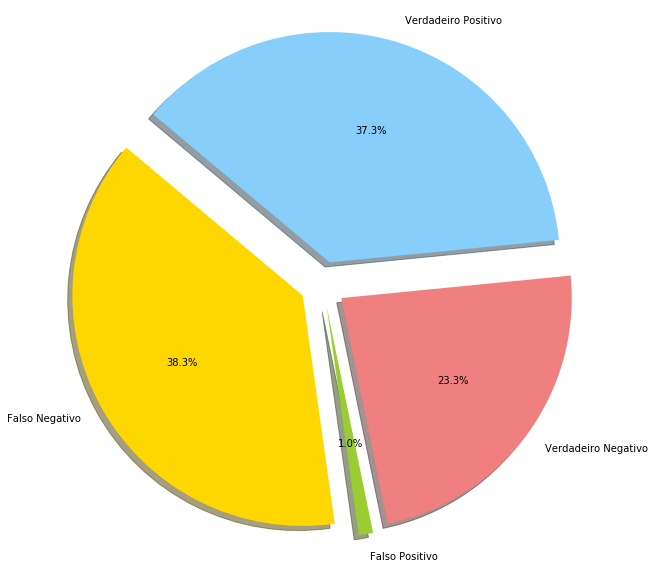

In [163]:
# Data to plot
labels = 'Falso Negativo', "Falso Positivo", "Verdadeiro Negativo", 'Verdadeiro Positivo'
sizes = [porc_f_n, porc_f_p, porc_v_n, porc_v_p]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0.1, 0.1, 0.1)  # explode 1st slice

# Plot
plt.figure(figsize=[10,10])
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

In [ ]:
# Data to plot
labels = 'Falso Negativo', "Falso Positivo", "Verdadeiro Negativo", 'Verdadeiro Positivo'
sizes = [porc_f_n, porc_f_p, porc_v_n, porc_v_p]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
#explode = (0, 0, 0, 0)

# Plot
#plt.pie(sizes, explode=explode, labels=labels, colors=colors,
#autopct='%1.1f%%', shadow=True, startangle=140
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()





___
### Concluindo

## Aperfeiçoamento:

Os trabalhos vão evoluir em conceito dependendo da quantidade de itens avançados:

* Limpar: \n, :, ", ', (, ), etc SEM remover emojis
* Corrigir separação de espaços entre palavras e emojis ou emojis e emojis
* Propor outras limpezas e transformações que não afetem a qualidade da informação ou classificação
* Criar categorias intermediárias de relevância baseadas na probabilidade: ex.: muito relevante, relevante, neutro, irrelevante, muito irrelevante (3 categorias: C, mais categorias conta para B)
* Explicar por que não posso usar o próprio classificador para gerar mais amostras de treinamento
* Propor diferentes cenários para Naïve Bayes fora do contexto do projeto
* Sugerir e explicar melhorias reais com indicações concretas de como implementar (indicar como fazer e indicar material de pesquisa)
* Montar um dashboard que periodicamente realiza análise de sentimento e visualiza estes dados

# Referências

[Naive Bayes and Text Classification](https://arxiv.org/pdf/1410.5329.pdf)  **Mais completo**

[A practical explanation of a Naive Bayes Classifier](https://monkeylearn.com/blog/practical-explanation-naive-bayes-classifier/) **Mais simples**